<a href="https://colab.research.google.com/github/Astridfrebja/Dat158_gruppeprosjekt/blob/master/TitanicOverlevelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Laster inn datasettet
df = pd.read_csv('train.csv')

print("Første 5 rader av datasettet:")
print(df.head())

print("\nInformasjon om manglende verdier:")
print(df.isnull().sum())

Første 5 rader av datasettet:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [ ]:
# Fyller manglende 'Age' med medianen
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Fyller manglende 'Embarked' med den mest frekvente verdien (Mode)
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Dropper trekk vi ikke skal bruke, eller som har for mange manglende verdier
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

print("Sjekk for manglende verdier etter rensing (skal være 0):")
print(df.isnull().sum().sum())

Sjekk for manglende verdier etter rensing (skal være 0):
0


/tmp/ipython-input-2053209734.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-2053209734.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Konverterer kategoriske variabler (Sex, Embarked, Pclass) til numeriske
# Pclass er kategorisk selv om det er tall (1., 2., 3. klasse)
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=int)

print("\nData etter One-Hot Encoding:")
print(df.head())


Data etter One-Hot Encoding:
   Survived   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0  22.0      1      0   7.2500         1           0           1   
1         1  38.0      1      0  71.2833         0           0           0   
2         1  26.0      0      0   7.9250         0           0           1   
3         1  35.0      1      0  53.1000         0           0           1   
4         0  35.0      0      0   8.0500         1           0           1   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  



Features (X) - de første radene:
    Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
0  22.0      1      0   7.2500         1           0           1         0   
1  38.0      1      0  71.2833         0           0           0         0   
2  26.0      0      0   7.9250         0           0           1         0   
3  35.0      1      0  53.1000         0           0           1         0   
4  35.0      0      0   8.0500         1           0           1         0   

   Pclass_3  
0         1  
1         0  
2         1  
3         0  
4         1  

Target (y) - de første verdiene:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Trening sett størrelse: 712 rader
Test sett størrelse: 179 rader

Logistisk Regresjon Nøyaktighet: 79.89%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Nøyaktighet: 81.56%

Confusion Matrix for Random forest: 
[[90 15]
 [21 53]]


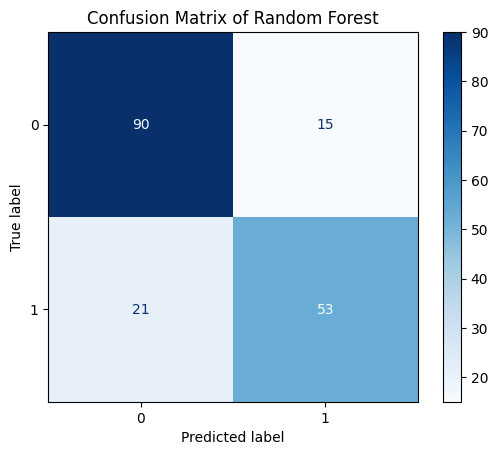


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
# Definerer Features (X) og Target (y)
X = df.drop('Survived', axis=1) # Alle kolonner unntatt 'Survived'
y = df['Survived']             # Kolonnen vi skal forutsi

#La inn slik at vi kan se data før test
print("\nFeatures (X) - de første radene:")
print(X.head())

print("\nTarget (y) - de første verdiene:")
print(y.head())


# Splitter dataene i trenings- (80%) og testsett (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrening sett størrelse: {X_train.shape[0]} rader")
print(f"Test sett størrelse: {X_test.shape[0]} rader")

# --- Logistisk Regresjon ---
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"\nLogistisk Regresjon Nøyaktighet: {lr_accuracy*100:.2f}%")

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\nRandom Forest Nøyaktighet: {rf_accuracy*100:.2f}%")



#Confusion matrix
cm = confusion_matrix(y_test, lr_pred)
print("\nConfusion Matrix for Random forest: ")
print(cm)


#Visualize the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

#Classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


-------------------------------------------------------------
De 5 viktigste faktorene for overlevelse (Random Forest):
Sex_male    0.451826
Fare        0.183911
Pclass_3    0.119495
Age         0.104412
SibSp       0.051611
dtype: float64


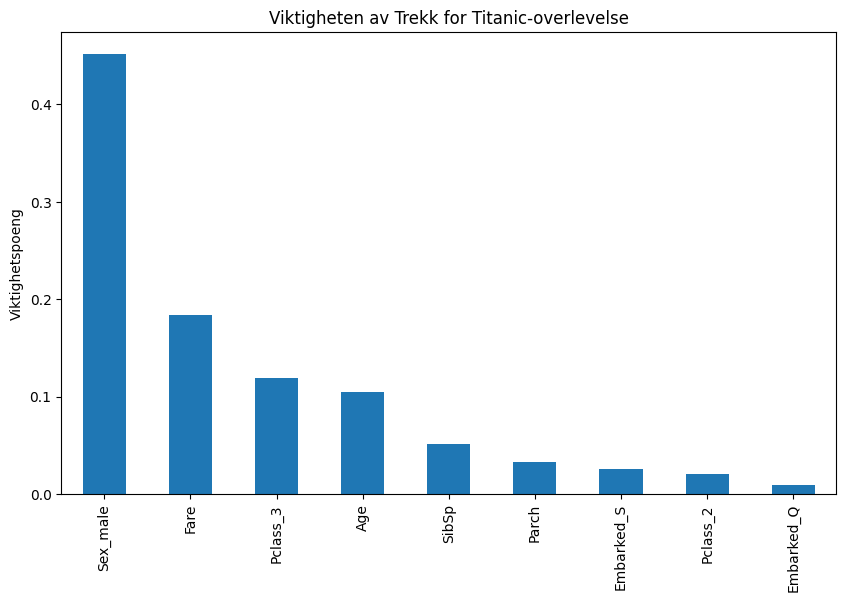

In [ ]:
import pandas as pd
# Sørg for at X_train er definert (fra blokk 3) og inneholder trekk-kolonnene dine

# Henter viktigheten fra den trente Random Forest-modellen
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

print("\n-------------------------------------------------------------")
print("De 5 viktigste faktorene for overlevelse (Random Forest):")
# Skriver ut de 5 viktigste faktorene
print(feature_importances.nlargest(5))

# Valgfritt: Visualiser alle faktorene
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Viktigheten av Trekk for Titanic-overlevelse')
plt.ylabel('Viktighetspoeng')
plt.show()

In [ ]:
import pickle
with open('titanic_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Modellen er lagret som 'titanic_rf_model.pkl'.")

Modellen er lagret som 'titanic_rf_model.pkl'.


In [ ]:
from google.colab import files

# Laster ned den lagrede Random Forest-modellen
files.download('titanic_rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>